In [732]:
%autoreload 2

In [733]:
import ajc
import numpy as np
import matplotlib.pyplot as plt

In [765]:
def simpleq(n):
    Q = np.zeros((n,n))
    np.fill_diagonal(Q[1:,:], 1)
    np.fill_diagonal(Q[:,1:], 1)
    np.fill_diagonal(Q, -2)
    return Q

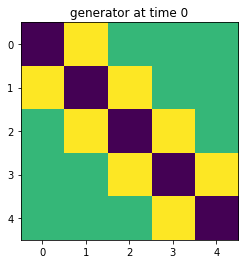

In [766]:
nx = 5
nt = 30
dt = 0.5

dts = np.array([dt for i in range(nt)])
#dts[-1] = 100
Qs = np.dstack([simpleq(nx) for i in range(nt)])

plt.title("generator at time 0")
plt.imshow(Qs[:,:,0])

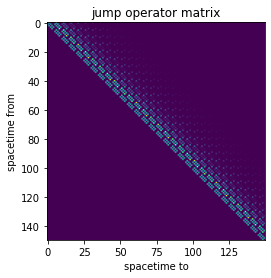

In [770]:
j1 = ajc.AJCGalerkin(Qs, dts)
plt.title("jump operator matrix")
plt.xlabel("spacetime to")
plt.ylabel("spacetime from")
plt.imshow(j1.km)

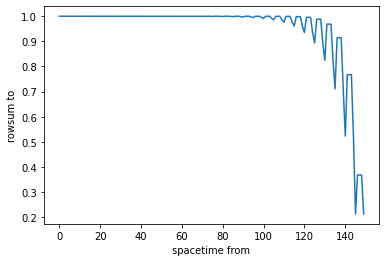

In [747]:
plt.xlabel("spacetime from")
plt.ylabel("rowsum to")
plt.plot(np.sum(j1.km, axis=1)); 

In [755]:
p=np.zeros((nx, nt))
p[0,0]=1

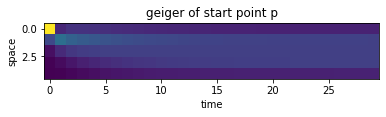

In [757]:
g = j1.geiger(p)
plt.xlabel("time")
plt.ylabel("space")
plt.title("geiger of start point p")
plt.imshow(g)

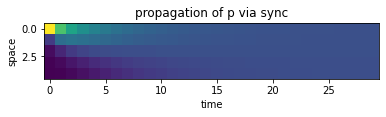

In [758]:
s = j1.synchronize(g)
plt.xlabel("time")
plt.ylabel("space")
plt.title("propagation of p via sync")
plt.imshow(s)

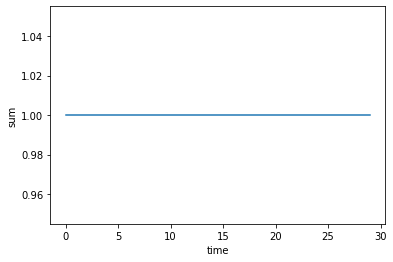

In [761]:
plt.ylabel("sum"); plt.xlabel("time")
plt.plot(s.sum(axis=0))